In [1]:
# 모듈 설정

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [2]:
# 데이터 수입

X = np.load('/content/drive/MyDrive/dataset/rgb_cnn_input.npy')
Y = np.load('/content/drive/MyDrive/dataset/rgb_cnn_target.npy')

In [3]:
# 데이터 분할

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [4]:
# 데이터 선처리

my_resize = 128
X_train = X_train.reshape(X_train.shape[0], my_resize, my_resize, 3).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], my_resize, my_resize, 3).astype('float32')/255
print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(857, 128, 128, 3)
(215, 128, 128, 3)
(857, 1)
(215, 1)


[515, 730, 327, 79, 355, 131, 718, 518, 850, 106, 684, 818, 328, 471, 495, 774]


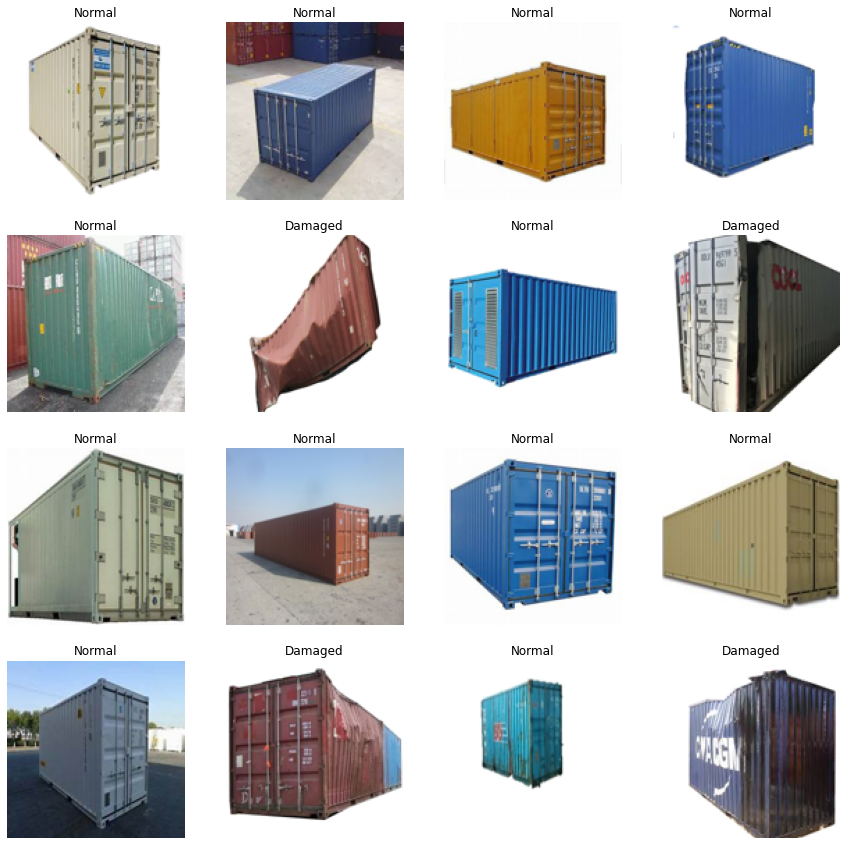

In [5]:
# 샘플이미지 출력

total =  len(X_train)
pick = random.sample(range(0,total),16)
print(pick)

fig, spot = plt.subplots(4, 4, figsize=(15,15))
cnt = 0

for i in range(4):
  for j in range(4):
    spot[i,j].imshow(X_train[pick[cnt]])

    #라벨 정보 추가
    label = Y_train[pick[cnt]]
    if label:
      spot[i,j].title.set_text('Normal')
    else:
      spot[i,j].title.set_text('Damaged')
    spot[i,j].axis('off')
    cnt += 1

plt.savefig('sample.png')

In [6]:
# 모델 구성

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(128,128,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       7

In [7]:
# 모델 컴파일

model.compile(loss='binary_crossentropy',
             optimizer='adam', 
             metrics=['accuracy'])

In [8]:
# 모델 훈련

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=16, shuffle = True, callbacks=[early_stopping])

Epoch 1/30
54/54 [==============================] - 4s 36ms/step - loss: 0.7392 - accuracy: 0.5321 - val_loss: 0.5915 - val_accuracy: 0.7070
Epoch 2/30
54/54 [==============================] - 1s 25ms/step - loss: 0.5789 - accuracy: 0.6931 - val_loss: 0.4864 - val_accuracy: 0.7488
Epoch 3/30
54/54 [==============================] - 1s 24ms/step - loss: 0.5395 - accuracy: 0.7258 - val_loss: 0.5396 - val_accuracy: 0.6791
Epoch 4/30
54/54 [==============================] - 1s 24ms/step - loss: 0.5137 - accuracy: 0.7515 - val_loss: 0.5085 - val_accuracy: 0.7302
Epoch 5/30
54/54 [==============================] - 1s 25ms/step - loss: 0.4649 - accuracy: 0.7841 - val_loss: 0.4409 - val_accuracy: 0.7953
Epoch 6/30
54/54 [==============================] - 1s 25ms/step - loss: 0.4191 - accuracy: 0.8040 - val_loss: 0.4179 - val_accuracy: 0.8000
Epoch 7/30
54/54 [==============================] - 1s 25ms/step - loss: 0.4183 - accuracy: 0.8238 - val_loss: 0.3703 - val_accuracy: 0.8326
Epoch 8/30
54

In [9]:
# 모델 평가

loss , acc = model.evaluate(X_test, Y_test)
print('\n Test Loss: %.4f Test Accuracy : %.4f' % (loss, acc))

7/7 [==============================] - 1s 45ms/step - loss: 0.4243 - accuracy: 0.8791

 Test Loss: 0.4243 Test Accuracy : 0.8791


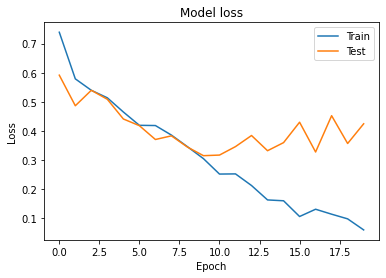

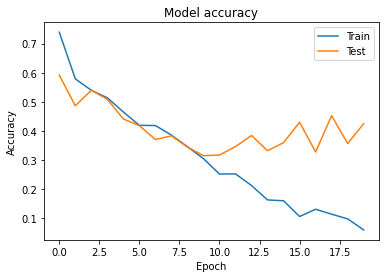

In [10]:
# 모델 학습 과정

def plt_show_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'],loc=0)

def plt_show_acc(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'],loc=0)

plt_show_loss(history)
plt.show()

plt_show_acc(history)
plt.show()

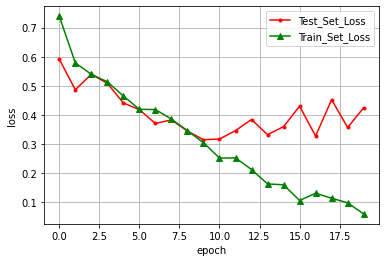

In [11]:
# 교차검증

y_vloss = history.history['val_loss']  # 테스트 세트의 오차
y_loss = history.history['loss']  #  학습 세트의 오차

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Test_Set_Loss')
plt.plot(x_len, y_loss, marker='^', c='green', label='Train_Set_Loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

[44] 번 사진
정답: [[0.]]
예측 [[0.00010995]]


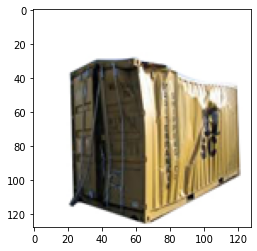

In [12]:
# 예측

total = len(X_test)
pick = random.sample(range(0, total), 1)
print(pick,'번 사진')

plt.imshow(X_test[pick].reshape(my_resize, my_resize, 3))

img = X_test[pick].reshape(1, my_resize, my_resize, 3)
pred = model.predict(img)

# 손상 = 0, 정상 = 1
print('정답:',Y_test[pick])
print('예측', pred)

In [13]:
# 모델 평가 방법 - 혼동행렬

print('혼동 행렬')
pred = model.predict(X_test)
print(pred.flatten())

pred = (pred > 0.5)
print(pred.flatten())

print(confusion_matrix(Y_test, pred))

혼동 행렬
[3.9372617e-01 9.9999988e-01 8.1403263e-02 4.1571906e-01 9.9115074e-01
 1.9464523e-02 2.3043762e-08 9.9718827e-01 9.9999952e-01 9.9998403e-01
 9.9999964e-01 9.9999738e-01 7.0948184e-01 5.4602966e-05 2.5064431e-03
 8.8876402e-01 1.1409472e-01 1.3335475e-01 9.9999452e-01 9.9541950e-01
 9.8903477e-01 7.1051791e-02 9.9946672e-01 9.8681378e-01 9.9995852e-01
 9.9951768e-01 9.9992526e-01 3.9656315e-02 9.9128294e-01 3.5932500e-04
 9.1302997e-01 7.4338847e-01 1.0759957e-01 4.6606775e-04 7.6365277e-02
 9.0987030e-03 1.0000000e+00 3.3733543e-02 8.6752754e-03 7.5353664e-01
 5.8193438e-02 1.0000000e+00 9.9999940e-01 8.9497036e-01 1.0995286e-04
 7.9200178e-01 9.3564743e-01 9.9968600e-01 5.5616733e-02 2.0517511e-02
 9.9269813e-01 7.5262654e-01 1.0000000e+00 3.2503281e-03 9.6437353e-01
 5.7859212e-01 2.2510362e-03 9.4479352e-01 9.9999726e-01 1.7141229e-02
 9.9999952e-01 1.2926518e-13 1.2076713e-02 9.5561278e-01 6.9026053e-01
 9.9931765e-01 2.6075724e-01 8.2215500e-01 8.8205060e-04 3.4766807e-03
